In [181]:
# Source reference to PyTorch official tutorial on traning a 
# classifier:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html


In [182]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [183]:
# load data CIFAR10

# transform to tensor and normalize to [-1,1]
transform = transforms.Compose(
    [transforms.Resize(256),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# transform = transforms.Compose([
#         transforms.Resize(256),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize(
#             mean=model.original_model_info.mean,
#             std=model.original_model_info.std
#         )
#     ])
batch_size = 64
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


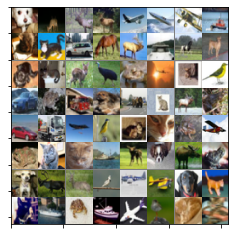

  dog  deer  deer  deer


In [184]:
# plot some example img
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training img
dataiter = iter(trainloader)
imges, labels = dataiter.next()

# show imgs
imshow(torchvision.utils.make_grid(imges))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [185]:
# load AlexNet pretrained model and modify the last layer to fit
# this dataset which has only 10 classes
model  = torchvision.models.alexnet(pretrained=True)

for prarm in model.parameters():
    prarm.requires_grad = False
    
model.classifier[6] = torch.nn.Linear(4096, 10)

In [186]:
# define a loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.001, 
                            momentum=0.9)

In [187]:
def train_vali_split_loader(trainset):
    trainset_, valset_ = torch.utils.data.random_split(trainset, 
                              [int(0.8*len(trainset)), 
                               int(0.2*len(trainset))])
    
    trainloader_ = torch.utils.data.DataLoader(trainset_, 
                                              batch_size=batch_size,
                                              shuffle=True, 
                                              num_workers=0)
    
    valiloader_ = torch.utils.data.DataLoader(valset_, 
                                              batch_size=batch_size,
                                              shuffle=True, 
                                              num_workers=0)
    return (trainloader_, valiloader_)

In [ ]:
# train the model
accu_train_list = []
for epoch in range(10):    # loop over the dataset multiple times
    # splite train into train and vali
    trainloader_, valiloader_ = train_vali_split_loader(trainset)
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader_, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        batch_num = 5
        
        running_loss += loss.item()
        if i % batch_num == batch_num-1:      # print every 5 mini-batches
            
            print('[%d, %5d] loss: %0.3f' % 
                 (epoch + 1, 
                  batch_size * i + 1, 
                  running_loss / batch_num))
            
            running_loss = 0.0
    
    predicted_correct_num = 0
    total_train = 0
    # run on vali set to get accuracy
    for i, data in enumerate(valiloader_, 0):
    # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        predicted_train = torch.max(model(inputs), 1)
        
        total_train += labels.size(0)
        predicted_correct_num += sum(predicted_train.indices == labels)
        print("Vali {0} th batch, {1} correct, batch size {2}".format(i, 
                                                                      predicted_correct_num,
                                                                      batch_size))
        
    accu_train = predicted_correct_num.item() / total_train
    accu_train_list.append(accu_train)
    
    print("Training Accu: ", accu_train)
    
print('Finish Traning')

In [102]:
sum(torch.max(outputs, 1).indices == labels)

tensor(2)

In [178]:
len(trainset)

50000

In [170]:
"Vali {0} th batch: \n".format(0)

'Vali 0 th batch: \n'

In [112]:
# try do train accu
predicted_correct_num = 0
total_train = 0
for i, data in enumerate(trainloader, 0):
# get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    predicted_train = torch.max(model(inputs), 1)

    total_train += labels.size(0)
    predicted_correct_num += sum(predicted_train.indices == labels)
    print("predicted_correct_num; ", predicted_correct_num)
    print("total_train: ", total_train)
    print("Accuracy: ", float(predicted_correct_num) / total_train)
accu_train = predicted_correct_num / (len(trainloader) * 64)
accu_train_list.append(accu_train)

print("Training Accu: ", accu_train)

predicted_correct_num;  tensor(1454)
total_train:  2000
Accuracy:  0.727
predicted_correct_num;  tensor(2920)
total_train:  4000
Accuracy:  0.73


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/yinruideng/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-112-bced24ee6285>", line 6, in <module>
    predicted_train = torch.max(model(inputs), 1)
  File "/Users/yinruideng/opt/miniconda3/lib/python3.7/site-packages/torch/nn/modules/module.py", line 550, in __call__
    result = self.forward(*input, **kwargs)
  File "/Users/yinruideng/opt/miniconda3/lib/python3.7/site-packages/torchvision/models/alexnet.py", line 45, in forward
    x = self.features(x)
  File "/Users/yinruideng/opt/miniconda3/lib/python3.7/site-packages/torch/nn/modules/module.py", line 550, in __call__
    result = self.forward(*input, **kwargs)
  File "/Users/yinruideng/opt/miniconda3/lib/python3.7/site-packages/torch/nn/modules/container.py", line 100, in forward
    input = module(input)
  File "/Users/yinruideng/opt/miniconda3/lib/pyth

KeyboardInterrupt: 

In [118]:
for i, data in enumerate(trainloader, 0):
    print(i)
    if i == 10:
        break

0
1
2
3
4
5
6
7
8
9
10


In [135]:
trainset_, valset_ = torch.utils.data.random_split(trainset, 
                              [int(0.8*len(trainset)), 
                               int(0.2*len(trainset))])

In [143]:
inputs, labels = trainset_

ValueError: too many values to unpack (expected 2)

In [156]:
len(trainset_)

40000

In [142]:
len(valset)

10000